# Customer Churn Prediction


# 📊 Customer Churn Prediction using Machine Learning

## 📌 Project Overview

Customer churn refers to customers leaving or discontinuing a service.  
This project builds an **end-to-end Machine Learning system** that predicts whether a customer is likely to churn based on their demographic details, service usage, contract type, and billing information.

The trained ML model is deployed using a **Streamlit web application** that allows real-time churn prediction through an interactive user interface.

---

## 🎯 Objective

- Predict the probability of customer churn
- Identify high-risk customers early
- Help businesses take preventive actions to improve customer retention

---

## 🧠 Problem Type

- **Machine Learning Task:** Binary Classification
- **Target Variable:** `Churn`
  - `1` → Customer will churn
  - `0` → Customer will not churn

---

## 📂 Dataset

- **Name:** Telco Customer Churn Dataset
- **Source:** Kaggle
- **Rows:** ~7,000 customers
- **Features:** Demographics, services, contracts, payments, billing
- **Target Column:** `Churn`

---

## 🏗️ Project Structure

```
Customer-Churn-Prediction/
│
├── data/
│   └── Telco-Customer-Churn.csv
│
├── notebooks/
│   └── churn_prediction.ipynb
│
├── src/
│   ├── preprocess.py
│   ├── model.py
│   └── utils.py
│
├── app/
│   └── streamlit_app.py
│
├── models/
│   ├── churn_model.pkl
│   ├── scaler.pkl
│   └── feature_names.pkl
│
├── visuals/
│   └── EDA & visualization outputs
│
├── README.md
└── requirements.txt

```
---

## 🔄 Machine Learning Pipeline

### 1️⃣ Data Loading

- Load raw CSV data using Pandas

### 2️⃣ Data Cleaning

- Convert `TotalCharges` to numeric
- Handle missing values
- Remove irrelevant features (`customerID`)

### 3️⃣ Feature Encoding

- Convert binary categories (Yes/No → 1/0)
- Apply One-Hot Encoding to categorical features

### 4️⃣ Feature Scaling

- Standardize numerical features using `StandardScaler`

### 5️⃣ Handling Class Imbalance

- Apply **SMOTE** to balance churn vs non-churn samples

### 6️⃣ Model Training

Multiple models were trained and compared:

- Logistic Regression
- Random Forest
- XGBoost (Best performing)

### 7️⃣ Model Evaluation

- Accuracy
- Precision
- Recall
- ROC-AUC Score
- Confusion Matrix

### 8️⃣ Model Persistence

Saved trained artifacts:

- `churn_model.pkl`
- `scaler.pkl`
- `feature_names.pkl`

---

## 🚀 Deployment (Streamlit App)

The Streamlit app:

- Takes customer input via UI
- Reconstructs feature vector exactly as in training
- Scales input data
- Predicts churn probability
- Displays risk level and visual indicators

### Risk Categories:

- **Low Risk:** < 0.4
- **Medium Risk:** 0.4 – 0.6
- **High Risk:** > 0.6

---


### 1.Import libraries


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE

import joblib


### 2.Load Dataset


In [ ]:
df = pd.read_csv("../data/Telco-Customer-Churn.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 3.Basic Dataset Info


In [ ]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### 4.Data Cleaning


In [ ]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)

df.drop("customerID", axis=1, inplace=True)


C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_26924\3424147152.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)


### 5.Encode Categorical Features


In [ ]:
df.replace({"Yes": 1, "No": 0}, inplace=True)

categorical_cols = df.select_dtypes(include=["object"]).columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

df.head()


C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_26924\3961472492.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"Yes": 1, "No": 0}, inplace=True)


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Male,...,TechSupport_No internet service,StreamingTV_1,StreamingTV_No internet service,StreamingMovies_1,StreamingMovies_No internet service,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,1,29.85,29.85,0,False,...,False,False,False,False,False,False,False,False,True,False
1,0,0,0,34,1,0,56.95,1889.50,0,True,...,False,False,False,False,False,True,False,False,False,True
2,0,0,0,2,1,1,53.85,108.15,1,True,...,False,False,False,False,False,False,False,False,False,True
3,0,0,0,45,0,0,42.30,1840.75,0,True,...,False,False,False,False,False,True,False,False,False,False
4,0,0,0,2,1,1,70.70,151.65,1,False,...,False,False,False,False,False,False,False,False,True,False


### 6.Split Features & Target


In [ ]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

print("Number of features:", X.shape[1])


Number of features: 30


### 7.SAVE FEATURE NAMES


In [ ]:
joblib.dump(list(X.columns), "../models/feature_names.pkl")


['../models/feature_names.pkl']

### 8.Feature Scaling


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


### 9.Train–Test Split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


### 10.Handle Class Imbalance (SMOTE)


In [ ]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

print("Class distribution after SMOTE:", np.bincount(y_train))


Class distribution after SMOTE: [4139 4139]


### 11.Train Logistic Regression


In [ ]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
print("Logistic Regression Results")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Results
              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1035
           1       0.51      0.80      0.62       374

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.74      0.75      1409



### 12.Train Random Forest


In [ ]:
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print("Random Forest Results")
print(classification_report(y_test, y_pred_rf))


Random Forest Results
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1035
           1       0.58      0.60      0.59       374

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409



### 13.Train XGBoost


In [ ]:
xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=42
)

xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)
print("XGBoost Results")
print(classification_report(y_test, y_pred_xgb))


d:\COLLEGE\SEMESTER6\AdLab\Assignments\agvenv\Lib\site-packages\xgboost\training.py:199: UserWarning: [01:35:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Results
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1035
           1       0.56      0.59      0.57       374

    accuracy                           0.77      1409
   macro avg       0.70      0.71      0.71      1409
weighted avg       0.77      0.77      0.77      1409



### 14.Compare ROC-AUC Scores


In [ ]:
models = {
    "Logistic Regression": lr,
    "Random Forest": rf,
    "XGBoost": xgb
}

for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    print(f"{name} ROC-AUC:", roc_auc_score(y_test, y_prob))


Logistic Regression ROC-AUC: 0.8404402077036349
Random Forest ROC-AUC: 0.8256839494691157
XGBoost ROC-AUC: 0.8149810121677129


### 15.Select Best Model


In [ ]:
best_model = xgb 


### 16.Confusion Matrix


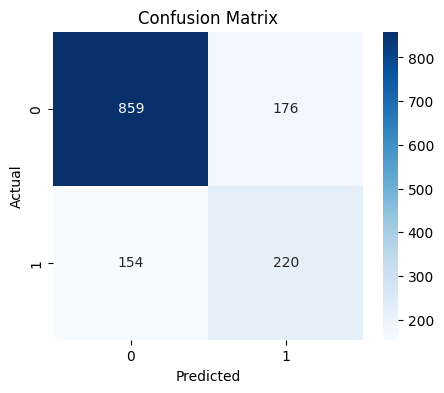

In [ ]:
cm = confusion_matrix(y_test, best_model.predict(X_test))

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### 17.ROC Curve


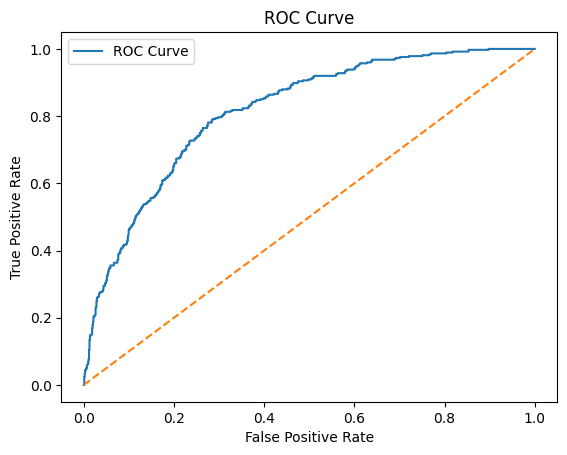

In [ ]:
y_prob = best_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


### 18.Save Model & Scaler


In [ ]:
joblib.dump(best_model, "../models/churn_model.pkl")
joblib.dump(scaler, "../models/scaler.pkl")

print("Model and scaler saved successfully!")


Model and scaler saved successfully!


In [ ]:
import joblib
scaler = joblib.load("../models/scaler.pkl")
features = joblib.load("../models/feature_names.pkl")

print(len(features))
print(scaler.n_features_in_)


30
30
